In [1]:
#bibliotecas padrão
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sklearn 

In [5]:
sklearn.__version__

'1.0.2'

In [3]:
#Criando um dataframe 
dados = pd.DataFrame(columns = ['casado','comprou'])
dados

,casado,comprou


In [4]:
#Adicionando dados ao dataframe

dados.loc[0,:] = ['Sim', 1]
dados.loc[1,:] = ['Sim', 1]
dados.loc[2,:] = ['Não', 1]
dados.loc[3,:] = ['Sim', 0]
dados.loc[4,:] = ['Não', 0]
dados.loc[5,:] = ['Não', 1]
dados.loc[6,:] = ['Sim', 1]
dados.loc[7,:] = ['Não', 0]

dados

,casado,comprou
0,Sim,1
1,Sim,1
2,Não,1
3,Sim,0
4,Não,0
5,Não,1
6,Sim,1
7,Não,0


In [6]:
#Não conseguimos trabalhar com dados categóricos, com textos diretos. Então para isso precisamos transformar isso em número de alguma forma

from sklearn.preprocessing import OrdinalEncoder
#Vou transformar minhas variaveis categóricas em números, Em uma forma ordinal ( tendo uma ordem) , o que em muitos modelos pode ser um problema

enc = OrdinalEncoder() #Criamos o objeto

enc.fit_transform(dados)  #apenas foi transformado, sem armazenar .

array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.]])

In [7]:
enc.categories_

[array(['Não', 'Sim'], dtype=object), array([0, 1], dtype=object)]

In [8]:
Dados_prep = pd.DataFrame(enc.fit_transform(dados), columns=dados.columns,dtype = int)
Dados_prep

,casado,comprou
0,1,1
1,1,1
2,0,1
3,1,0
4,0,0
5,0,1
6,1,1
7,0,0


In [9]:
# Etapa de modelagem 

X= Dados_prep[['casado']] #Colocando dois colchetes, nos volta uma tabela, colocando apenas um colchete, nos retorna um vetor
y = Dados_prep['comprou']

In [10]:
#Criando modelo Naive Bayes

from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB(alpha = 0)

cnb.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


CategoricalNB(alpha=0)

In [11]:
para_predizer = pd.DataFrame(columns = ['casado'])
para_predizer.loc[0,:] = [0]
para_predizer.loc[1,:] = [1]
para_predizer

,casado
0,0
1,1


In [12]:
cnb.predict_proba(para_predizer)
#Na primera coluna, está a probabilidade de NÃO comprar, na segunda coluna  está a probalidade de SIM comprar 

array([[0.5 , 0.5 ],
       [0.25, 0.75]])

**OLHANDO COM DADOS DE "VERDADE"**





In [14]:
caminho = '/content/gdrive/MyDrive/Colab_Notebooks/FLAI/Rafinha dos dados/Classificação/Dados/base_categoricalnb.csv'
data = pd.read_csv(caminho)
data.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no


In [18]:
# Separação em treino e teste
# fonte : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

x = data.drop('y', axis =1)
y = data.y

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size =0.3, random_state = 1)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
x_treino2 = pd.DataFrame(enc.fit_transform(x_treino), columns = x_treino.columns, dtype = int)
x_treino2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,0,1,0,0,1,4,2
1,7,1,0,0,2,0,0,3,0
2,9,1,6,0,2,0,0,7,4
3,9,1,5,0,0,0,0,3,4
4,1,2,7,0,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...
28826,10,1,6,1,0,0,1,4,1
28827,1,1,2,0,2,0,0,6,0
28828,1,1,2,0,2,2,1,6,0
28829,0,1,3,0,0,0,1,3,3


In [21]:
# como recuperar o que significa cada número 
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object)]

In [23]:
#ainda está em forma de teste
x_teste

,job,marital,education,default,housing,loan,contact,month,day_of_week
35577,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon
13950,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri
29451,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon
32295,blue-collar,single,high.school,no,yes,no,cellular,may,fri
27477,technician,married,professional.course,no,yes,no,cellular,nov,fri
...,...,...,...,...,...,...,...,...,...
33344,entrepreneur,divorced,basic.9y,no,no,no,cellular,may,tue
11690,admin.,married,university.degree,no,no,no,telephone,jun,fri
25695,retired,single,university.degree,no,yes,no,cellular,nov,wed
10932,management,single,basic.4y,no,no,no,telephone,jun,wed


In [24]:
# Preciso garantir que a transformação do treino seja EXATAMENTE IGUAL a transfomação do teste

x_teste2 = pd.DataFrame(enc.transform(x_teste), columns = x_teste.columns, dtype = int)
x_teste2 

#Não preciso utilziar o método fit (Ajustar), apenas uso a transformação

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,2,1,2,2,0,6,1
1,1,2,1,1,2,2,0,3,0
2,6,0,6,0,2,0,0,0,1
3,1,2,3,0,2,0,0,6,0
4,9,1,5,0,2,0,0,7,0
...,...,...,...,...,...,...,...,...,...
12352,2,0,2,0,0,0,0,6,3
12353,0,1,6,0,0,0,1,4,0
12354,5,2,6,0,2,0,0,7,4
12355,4,2,0,0,0,0,1,4,4


**OBS**

SE TIVER UMA CATEGORIA NOS DADOS DE TESTE, QUE NÃO ESTÃO NOS DADOS DE TREINO, OCORRERÁ UM ERRO.

O QUE FAZER? 

Argumento -> **Handle_unknown**

Cuidado que preciso ter -> O modelo vai aprender sem esse dado, então quando tiver, ocorretá métricas ou previsões que não fazem sentido.

In [25]:
#Feito para passar lista para ele, e ele retorna uma lista


from sklearn.preprocessing import LabelEncoder

enc2 = LabelEncoder()
y_treino2 = enc2.fit_transform(y_treino)
y_treino2

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
#Mesma coisa, utilizo apenas o método transform, o fit apenas nos dados de treino
y_teste2 = enc2.transform(y_teste)
y_teste2

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
cnb2 = CategoricalNB(alpha=0)
cnb2.fit(x_treino2, y_treino2)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


CategoricalNB(alpha=0)

In [28]:
pred = cnb2.predict_proba(x_teste2)
pred

array([[0.98737425, 0.01262575],
       [0.97166909, 0.02833091],
       [0.74523231, 0.25476769],
       ...,
       [0.5423671 , 0.4576329 ],
       [0.93616566, 0.06383434],
       [0.98315763, 0.01684237]])

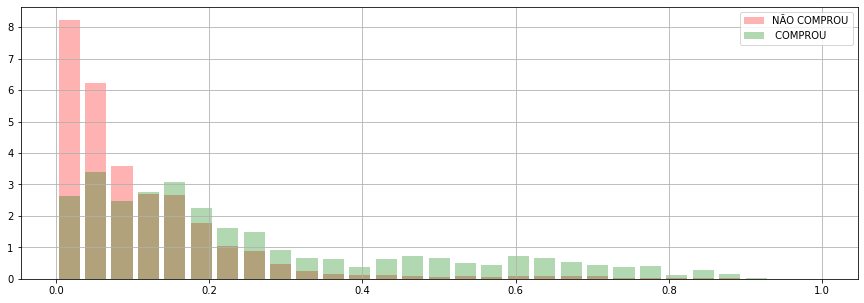

In [32]:
#Analisando 

plt.figure(figsize =(15,5))
plt.hist(pred[y_teste2 == 0,1], bins = np.linspace(0,1,30), color = 'r', alpha = 0.3, rwidth = 0.8, density = True, label = 'NÃO COMPROU')
plt.hist(pred[y_teste2 == 1,1], bins = np.linspace(0,1,30), color = 'g', alpha = 0.3, rwidth = 0.8, density = True, label = ' COMPROU')

plt.legend()
plt.grid()